In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Визуализация данных

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

## Страны мира

In [3]:
df1 = pd.read_csv('data/world_country_and_usa_states_latitude_and_longitude_values.csv')
df1

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [4]:
df1 = clean_dataset(df1.iloc[:, 1:3])
df1

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


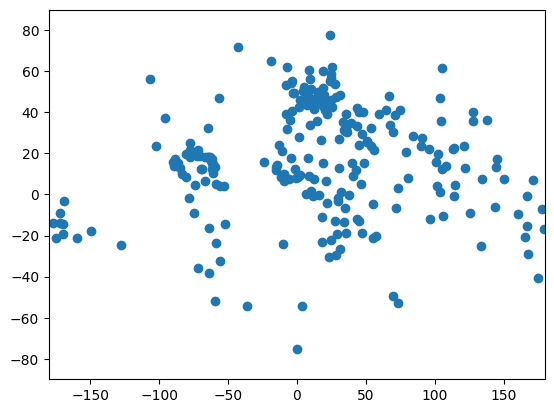

In [5]:
plt.scatter(df1['longitude'], df1['latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Посетители торгового центра

In [6]:
df2 = pd.read_csv('data/Mall_Customers.csv')
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [47]:
df2['Gender'] = (df2['Gender'] == 'Male').astype(int)
df2 = df2.drop(columns=['CustomerID'])
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,0,32,126,74
198,0,32,137,18


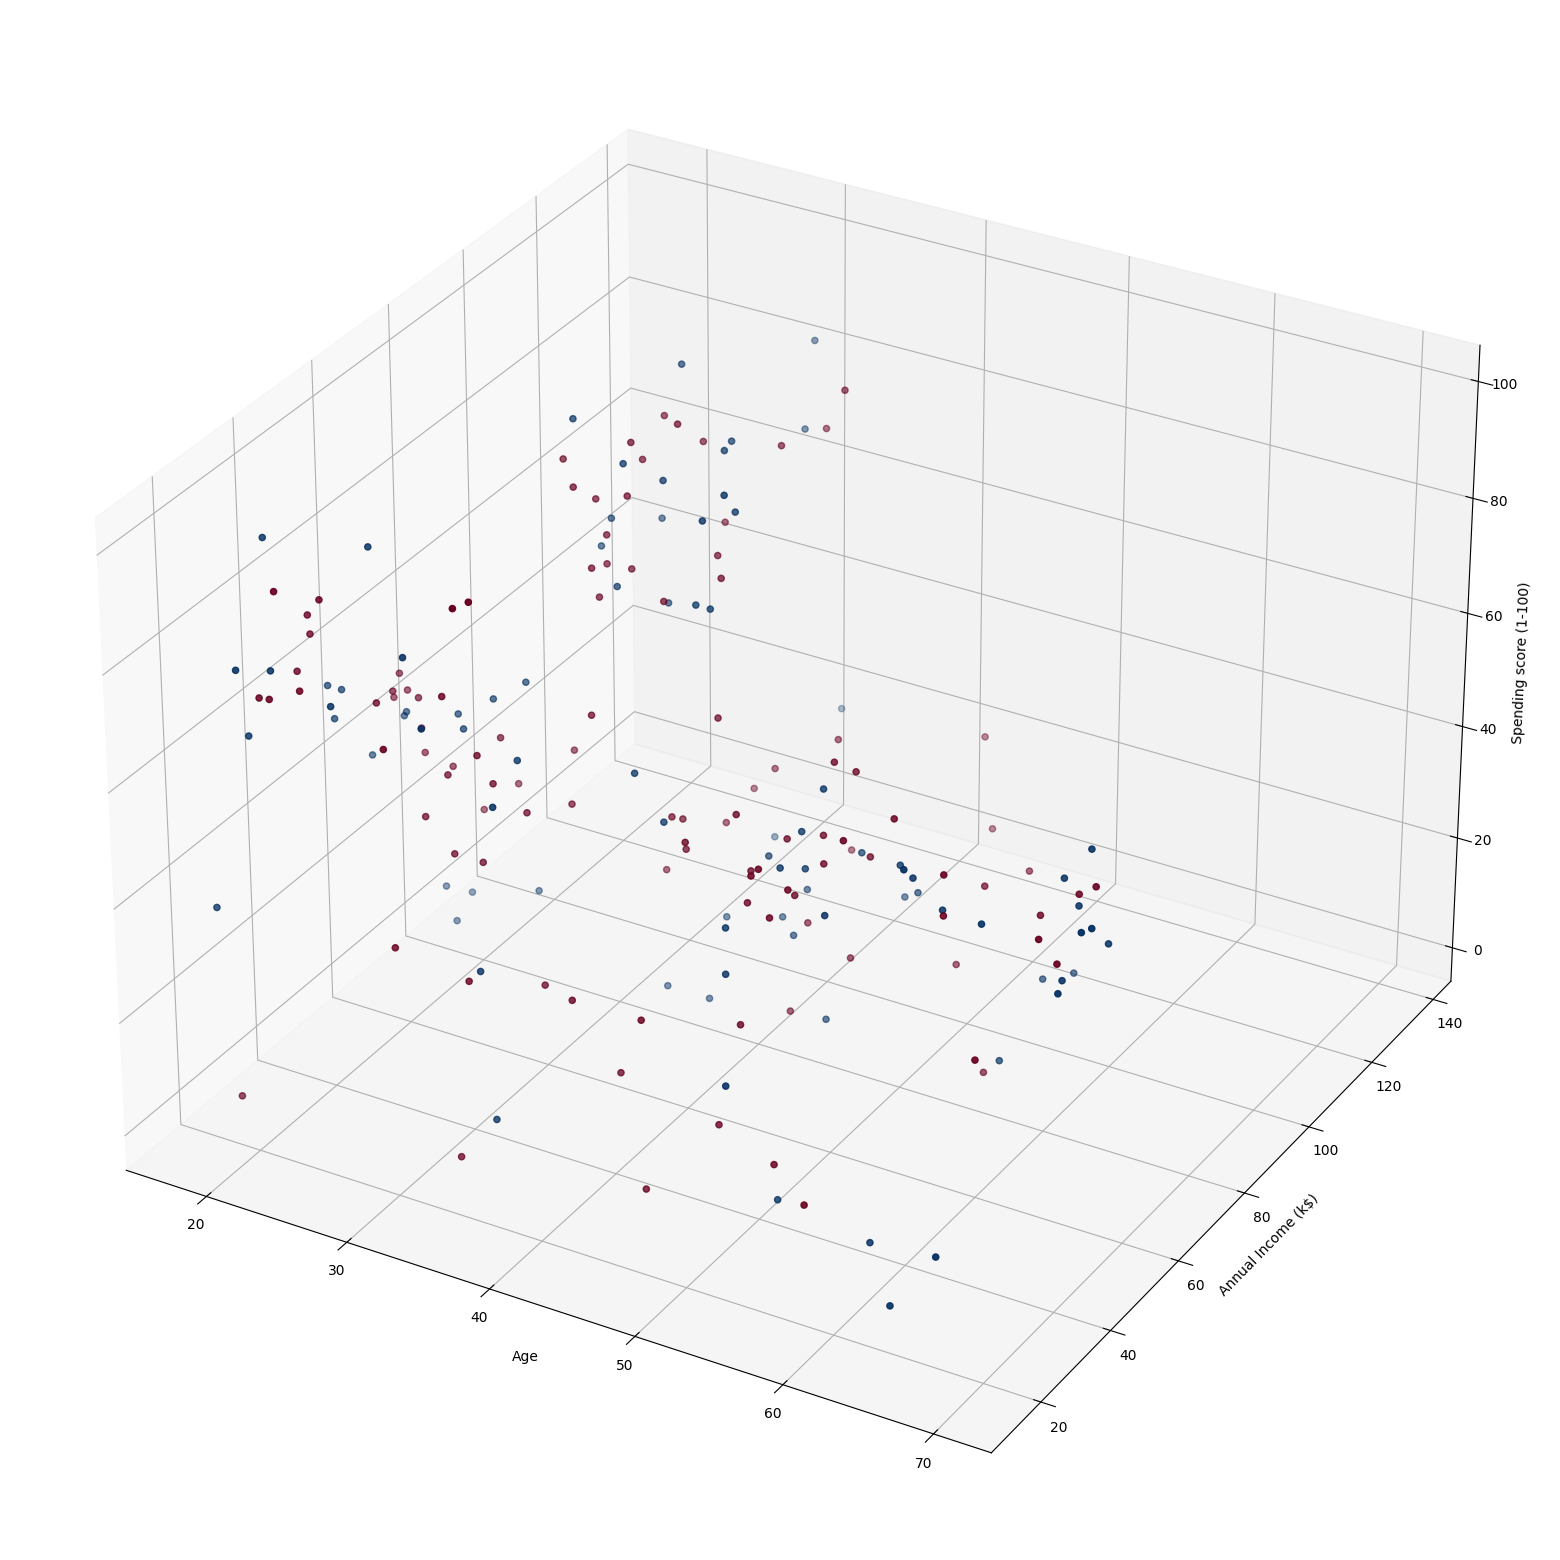

In [18]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.scatter(df2['Age'], df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=df2['Gender'], cmap='RdBu')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending score (1-100)')
plt.show()

# Построение дендрограмм

In [48]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

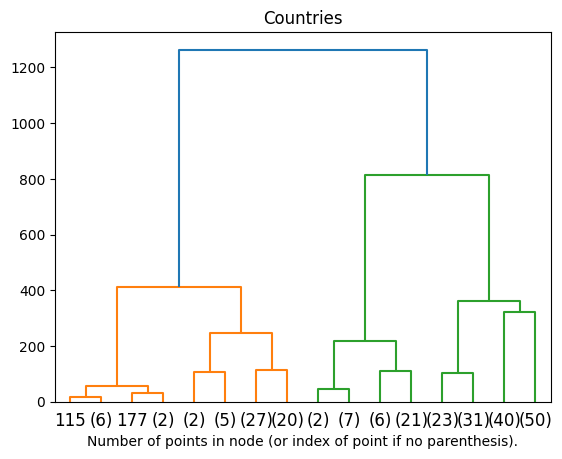

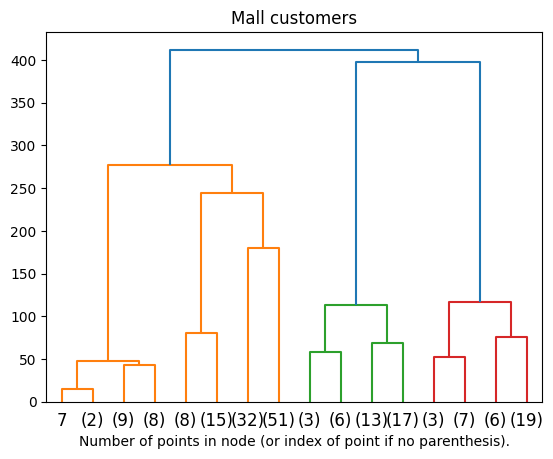

In [49]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
for title, X in (('Countries', df1), ('Mall customers', df2)):
	model.fit(X)
	plt.title(title)
	plot_dendrogram(model, truncate_mode="level", p=3)
	plt.xlabel("Number of points in node (or index of point if no parenthesis).")
	plt.show()

# Определение оптимального числа кластеров

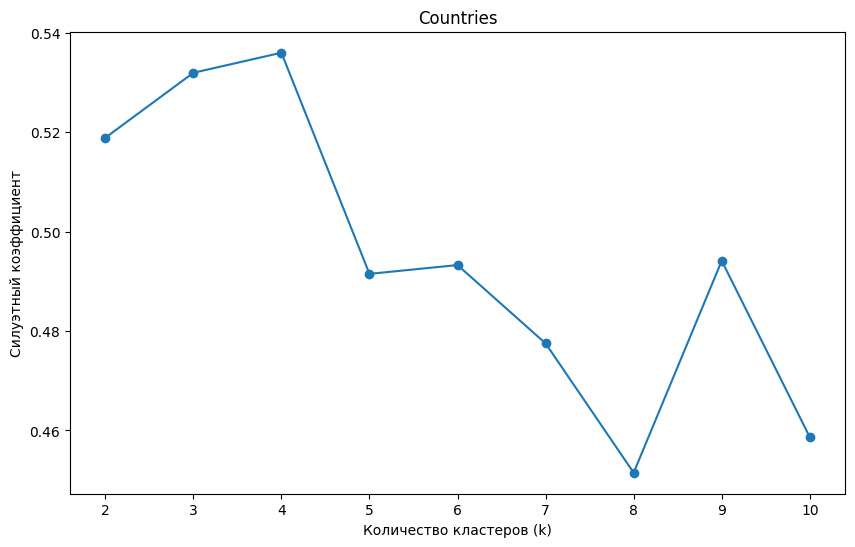

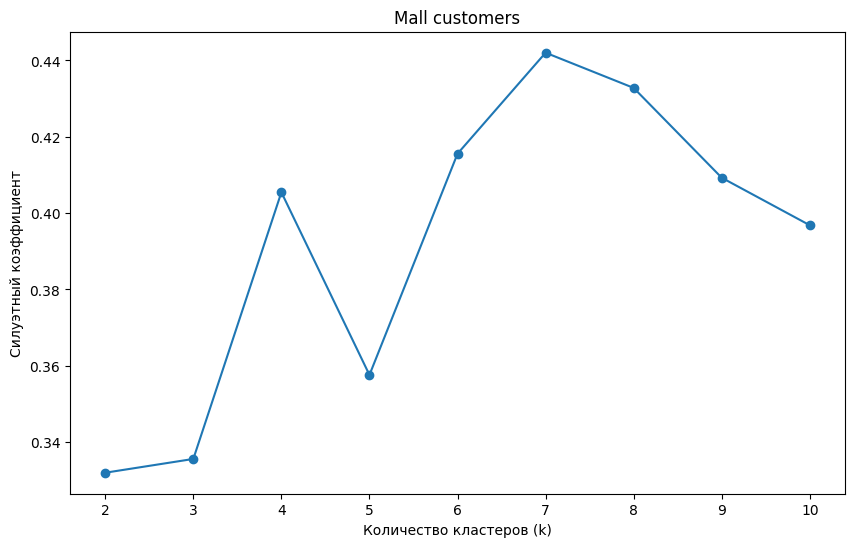

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def find_optimal_k_silhouette(title, X, max_k=10):
	silhouette_scores = []
	
	for k in range(2, max_k + 1):
		kmeans = KMeans(n_clusters=k, random_state=42)
		kmeans.fit(X)
		score = silhouette_score(X, kmeans.labels_)
		silhouette_scores.append(score)
	
	plt.figure(figsize=(10, 6))
	plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
	plt.title(title)
	plt.xlabel('Количество кластеров (k)')
	plt.ylabel('Силуэтный коэффициент')
	plt.xticks(range(2, max_k + 1))
	plt.show()


for title, X in (('Countries', df1), ('Mall customers', df2)):
	find_optimal_k_silhouette(title, X)

In [25]:
import time

from sklearn.cluster import AgglomerativeClustering as SKAgglomerativeClustering
from sklearn.cluster import DBSCAN as SKDBSCANClustering
from sklearn.mixture import GaussianMixture as SKEMClustering

from students.aharlamov.lab1.source import AgglomerativeClustering, Clustering, DBSCANClustering, EMClustering

# Кластеризация стран мира

In [26]:
def plot_countries(title, labels, df):
	new_df = df.copy()
	new_df['cluster'] = labels
	plt.scatter(new_df['longitude'], new_df['latitude'], c=new_df['cluster'], cmap='rainbow')
	plt.xlim(-180, 180)
	plt.ylim(-90, 90)
	plt.title(title)
	plt.show()
	

def plot_customers(title, labels, df):
	new_df = df.copy()
	new_df['cluster'] = labels
	fig = plt.figure(figsize=(20, 20))
	ax = fig.add_subplot(projection='3d')
	ax.scatter(new_df['Age'], new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=new_df['cluster'], cmap='rainbow')
	ax.set_xlabel('Age')
	ax.set_ylabel('Annual Income (k$)')
	ax.set_zlabel('Spending score (1-100)')
	plt.title(title)
	plt.show()

In [36]:
from collections import Counter


def get_cluster_fulfillment(labels: list[int]):
	return sorted(list(Counter(labels).values()))


def compare_algorithms(models_to_compare: list[tuple], df: pd.DataFrame, plotter):
	for my_model, sklearn_model in models_to_compare:
		my_model_start_time = time.time()
		my_model_labels = my_model.fit_predict(df)
		plotter('My ' + my_model.__class__.__name__, my_model_labels, df)
		my_model_end_time = time.time()
		my_model_extra, my_model_intra = Clustering.get_cluster_distances(df, my_model_labels)
		my_model_fulfillment = get_cluster_fulfillment(my_model_labels)
		
		print(f'extra={my_model_extra}\n'
			  f'mean_intra={my_model_intra.mean()}\n'
			  f'fulfillment={my_model_fulfillment}\n'
			  f'time={my_model_end_time - my_model_start_time}s')
		
		sklearn_model_start_time = time.time()
		sklearn_model_labels = sklearn_model.fit_predict(df)
		plotter('Sklearn ' + sklearn_model.__class__.__name__, sklearn_model_labels, df)
		sklearn_model_end_time = time.time()
		sklearn_model_extra, sklearn_model_intra = Clustering.get_cluster_distances(df, sklearn_model_labels)
		sklearn_model_fulfillment = get_cluster_fulfillment(sklearn_model_labels)
		
		print(f'extra={sklearn_model_extra}\n'
			  f'mean_intra={sklearn_model_intra.mean()}\n'
			  f'fulfillment={sklearn_model_fulfillment}\n'
			  f'time={sklearn_model_end_time - sklearn_model_start_time}s')

In [65]:
datasets_to_test = [
	[
		'Counties',
		df1,
		plot_countries,
		[
			(AgglomerativeClustering(n_clusters=4), SKAgglomerativeClustering(n_clusters=4)),
			(DBSCANClustering(eps=10, min_samples=3), SKDBSCANClustering(eps=10, min_samples=3)),
			(EMClustering(n_clusters=4, max_iter=20), SKEMClustering(n_components=4, max_iter=20)),
		]
	],
	[
		'Mall customers',
		df2,
		plot_customers,
		[
			(AgglomerativeClustering(n_clusters=7), SKAgglomerativeClustering(n_clusters=7)),
			(DBSCANClustering(eps=10, min_samples=4), SKDBSCANClustering(eps=10, min_samples=4)),
			(EMClustering(n_clusters=7, max_iter=20), SKEMClustering(n_components=7, max_iter=20)),
		]
	],
]

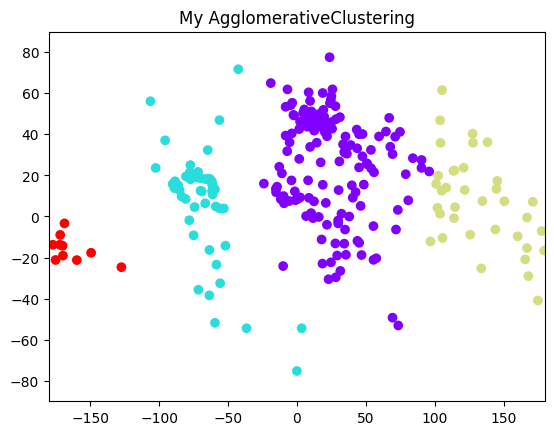

extra=165.1119238209271
mean_intra=36.06245563640347
fulfillment=[10, 36, 54, 144]
time=0.06016826629638672s


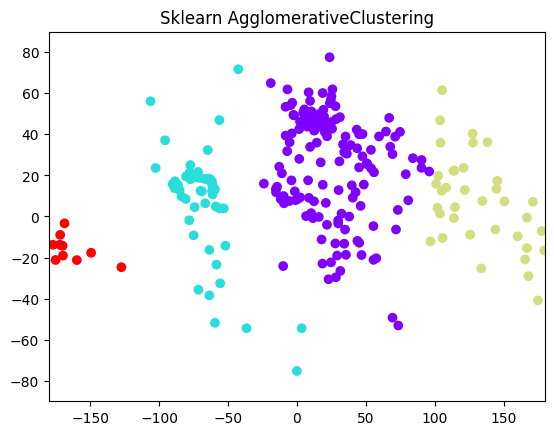

extra=165.1119238209271
mean_intra=36.06245563640347
fulfillment=[10, 36, 54, 144]
time=0.05825400352478027s


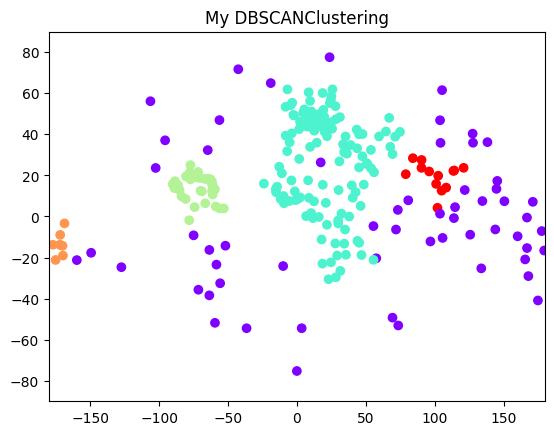

extra=135.7334907687077
mean_intra=41.69330392134238
fulfillment=[7, 13, 37, 59, 128]
time=0.7216331958770752s


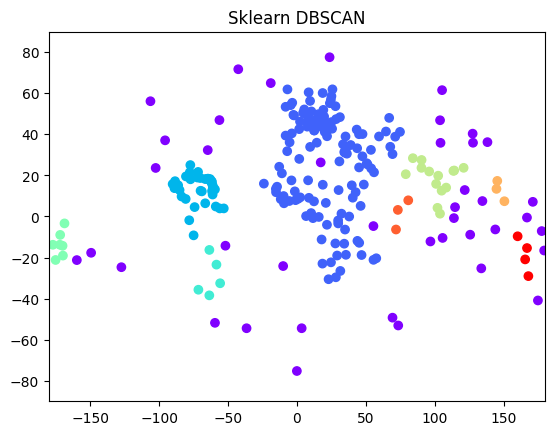

extra=136.45099216423125
mean_intra=29.037087531624422
fulfillment=[3, 3, 4, 5, 7, 14, 38, 41, 129]
time=0.05946493148803711s


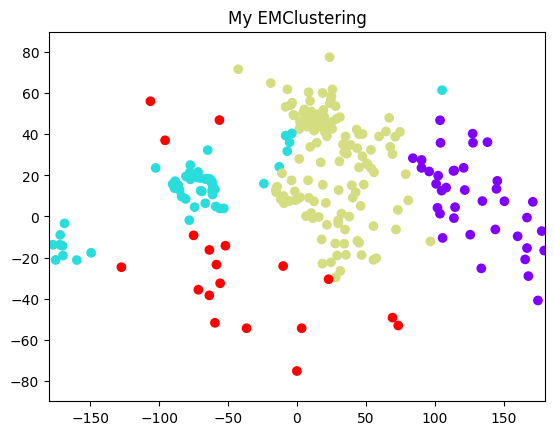

extra=119.92775837574982
mean_intra=55.33896072113337
fulfillment=[19, 38, 55, 132]
time=0.1329507827758789s


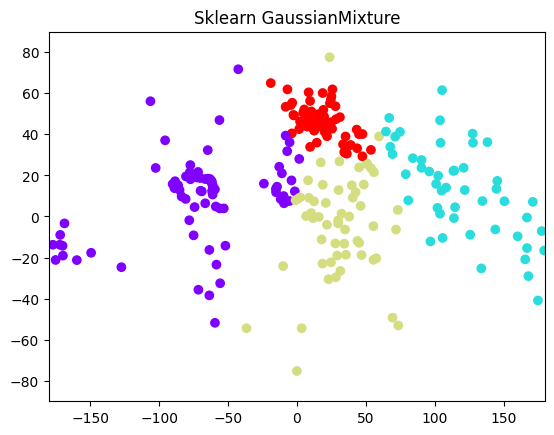

extra=104.69939276313657
mean_intra=42.641748618813445
fulfillment=[48, 57, 62, 77]
time=0.06617188453674316s


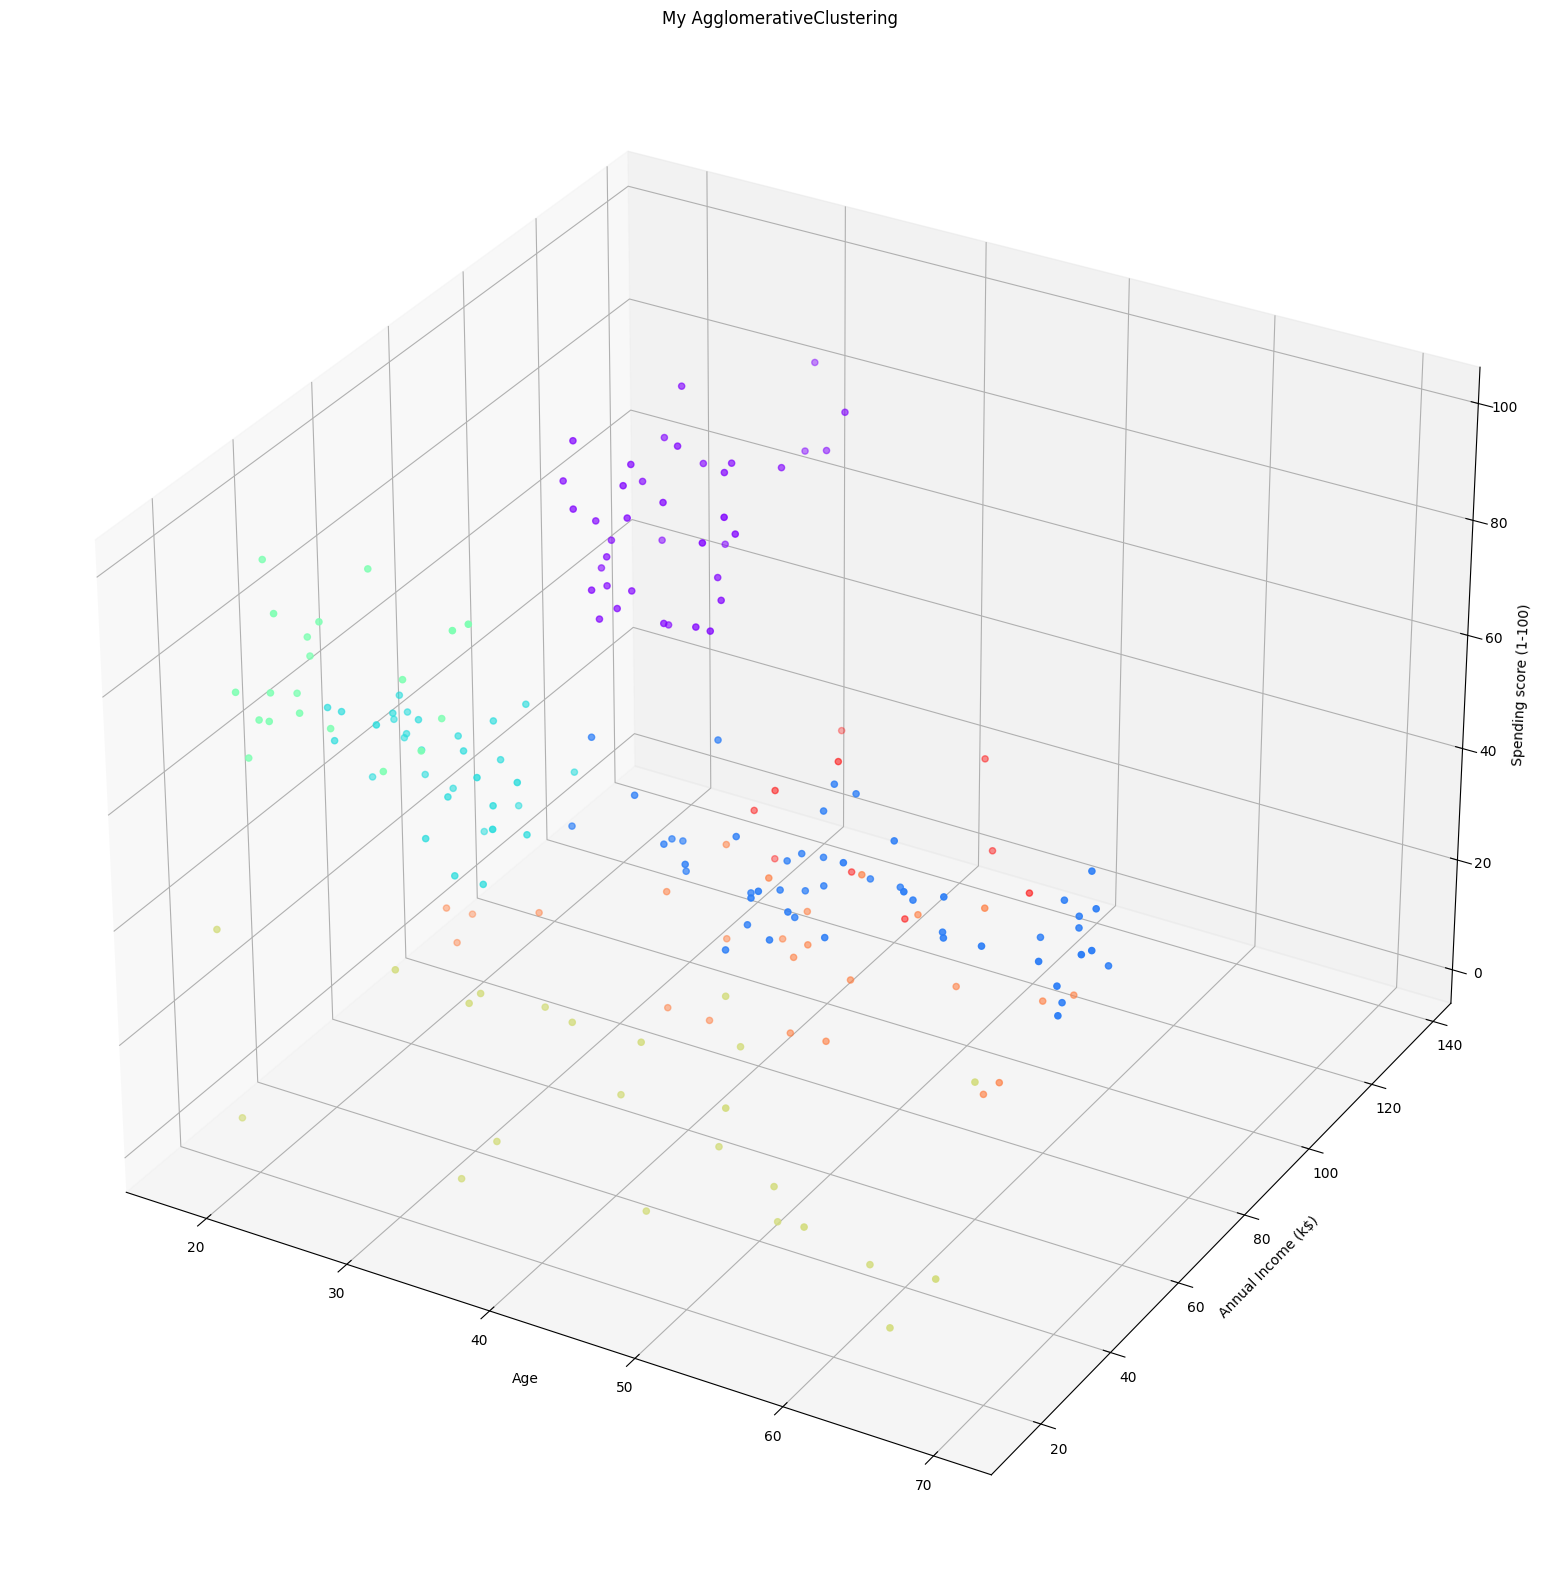

extra=58.443172293906294
mean_intra=21.553350050714272
fulfillment=[10, 20, 23, 25, 32, 39, 51]
time=0.2169189453125s


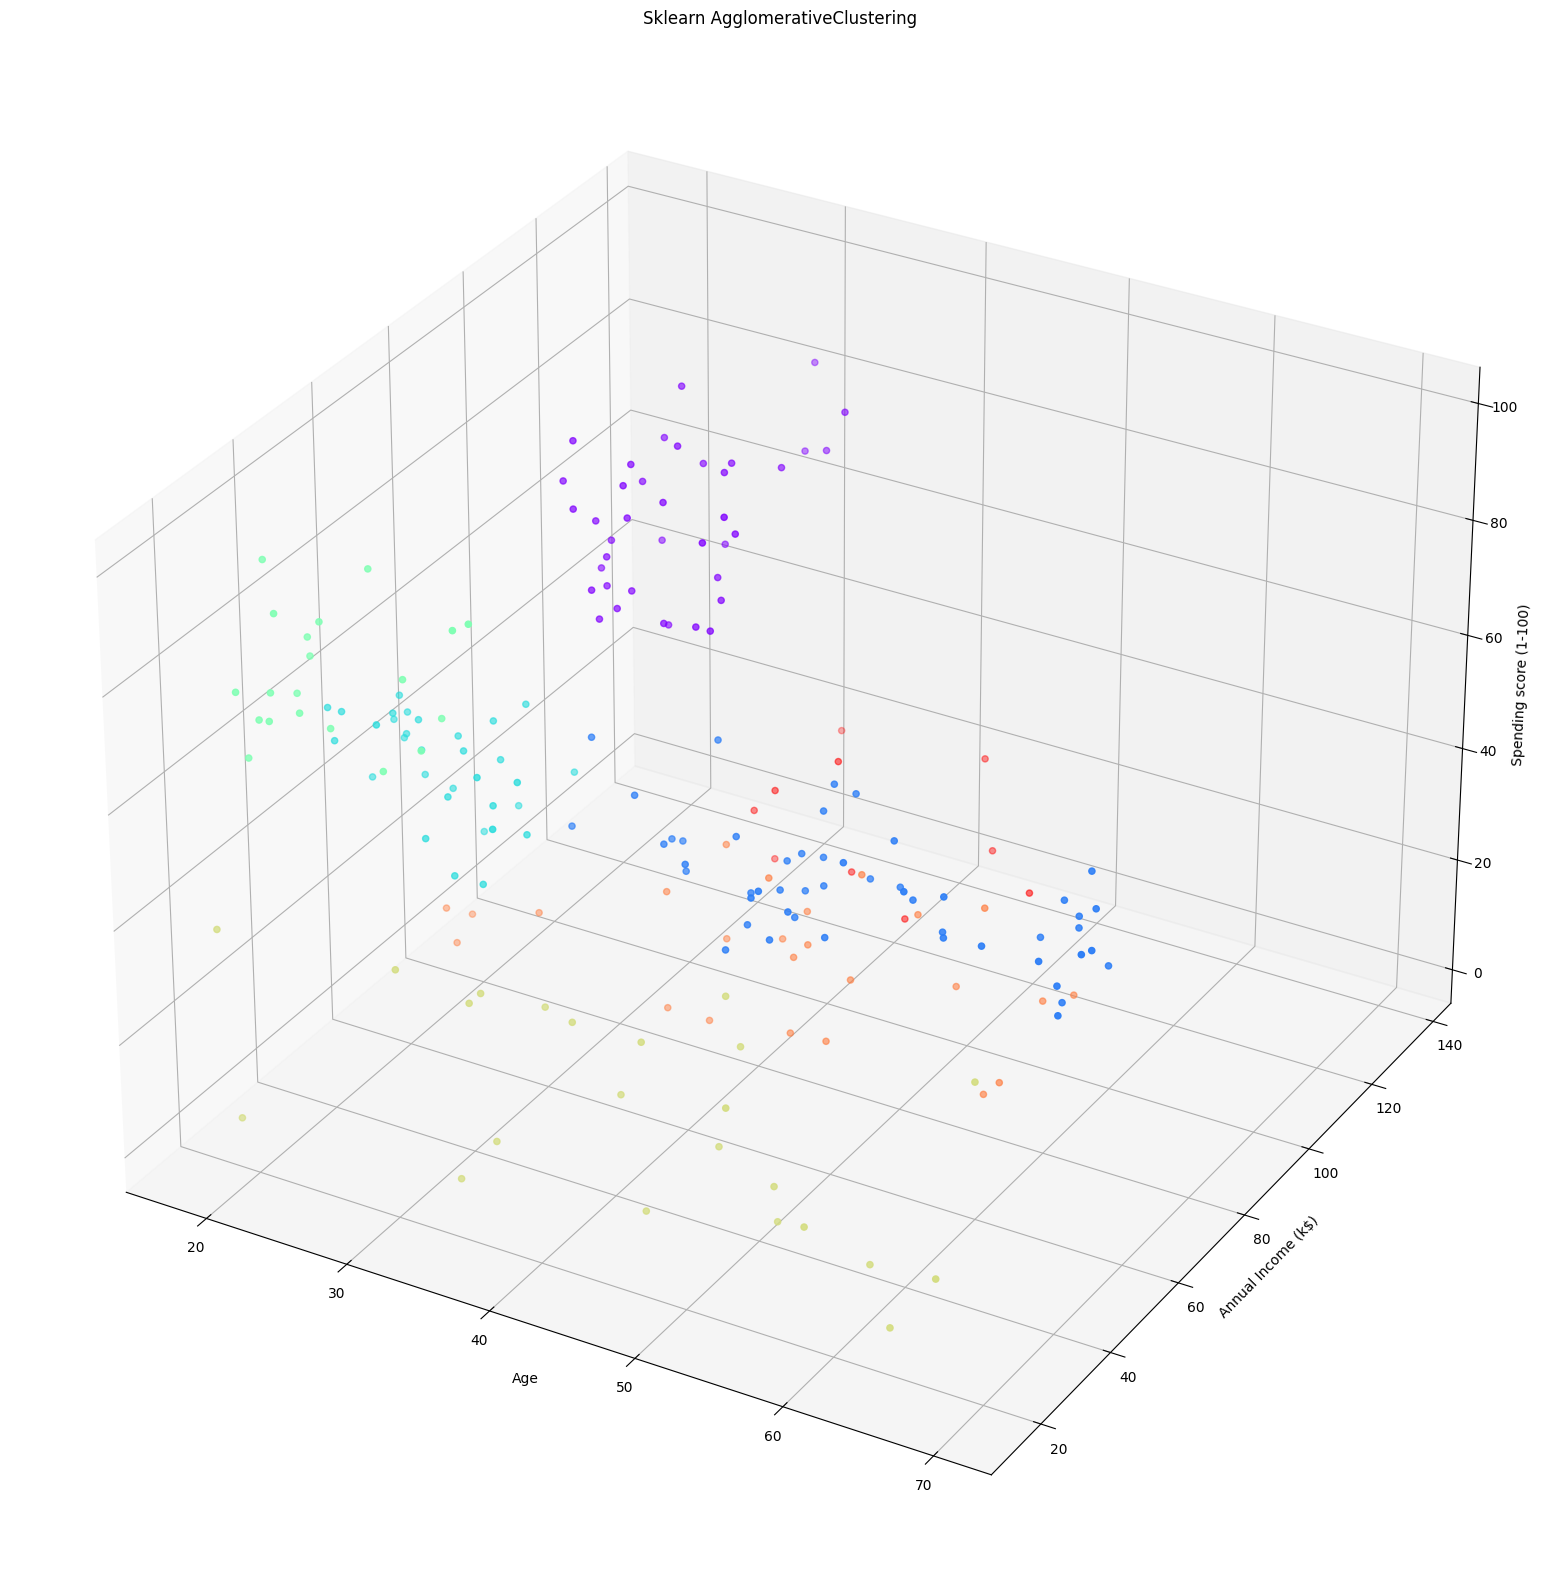

extra=58.443172293906294
mean_intra=21.553350050714272
fulfillment=[10, 20, 23, 25, 32, 39, 51]
time=0.22099709510803223s


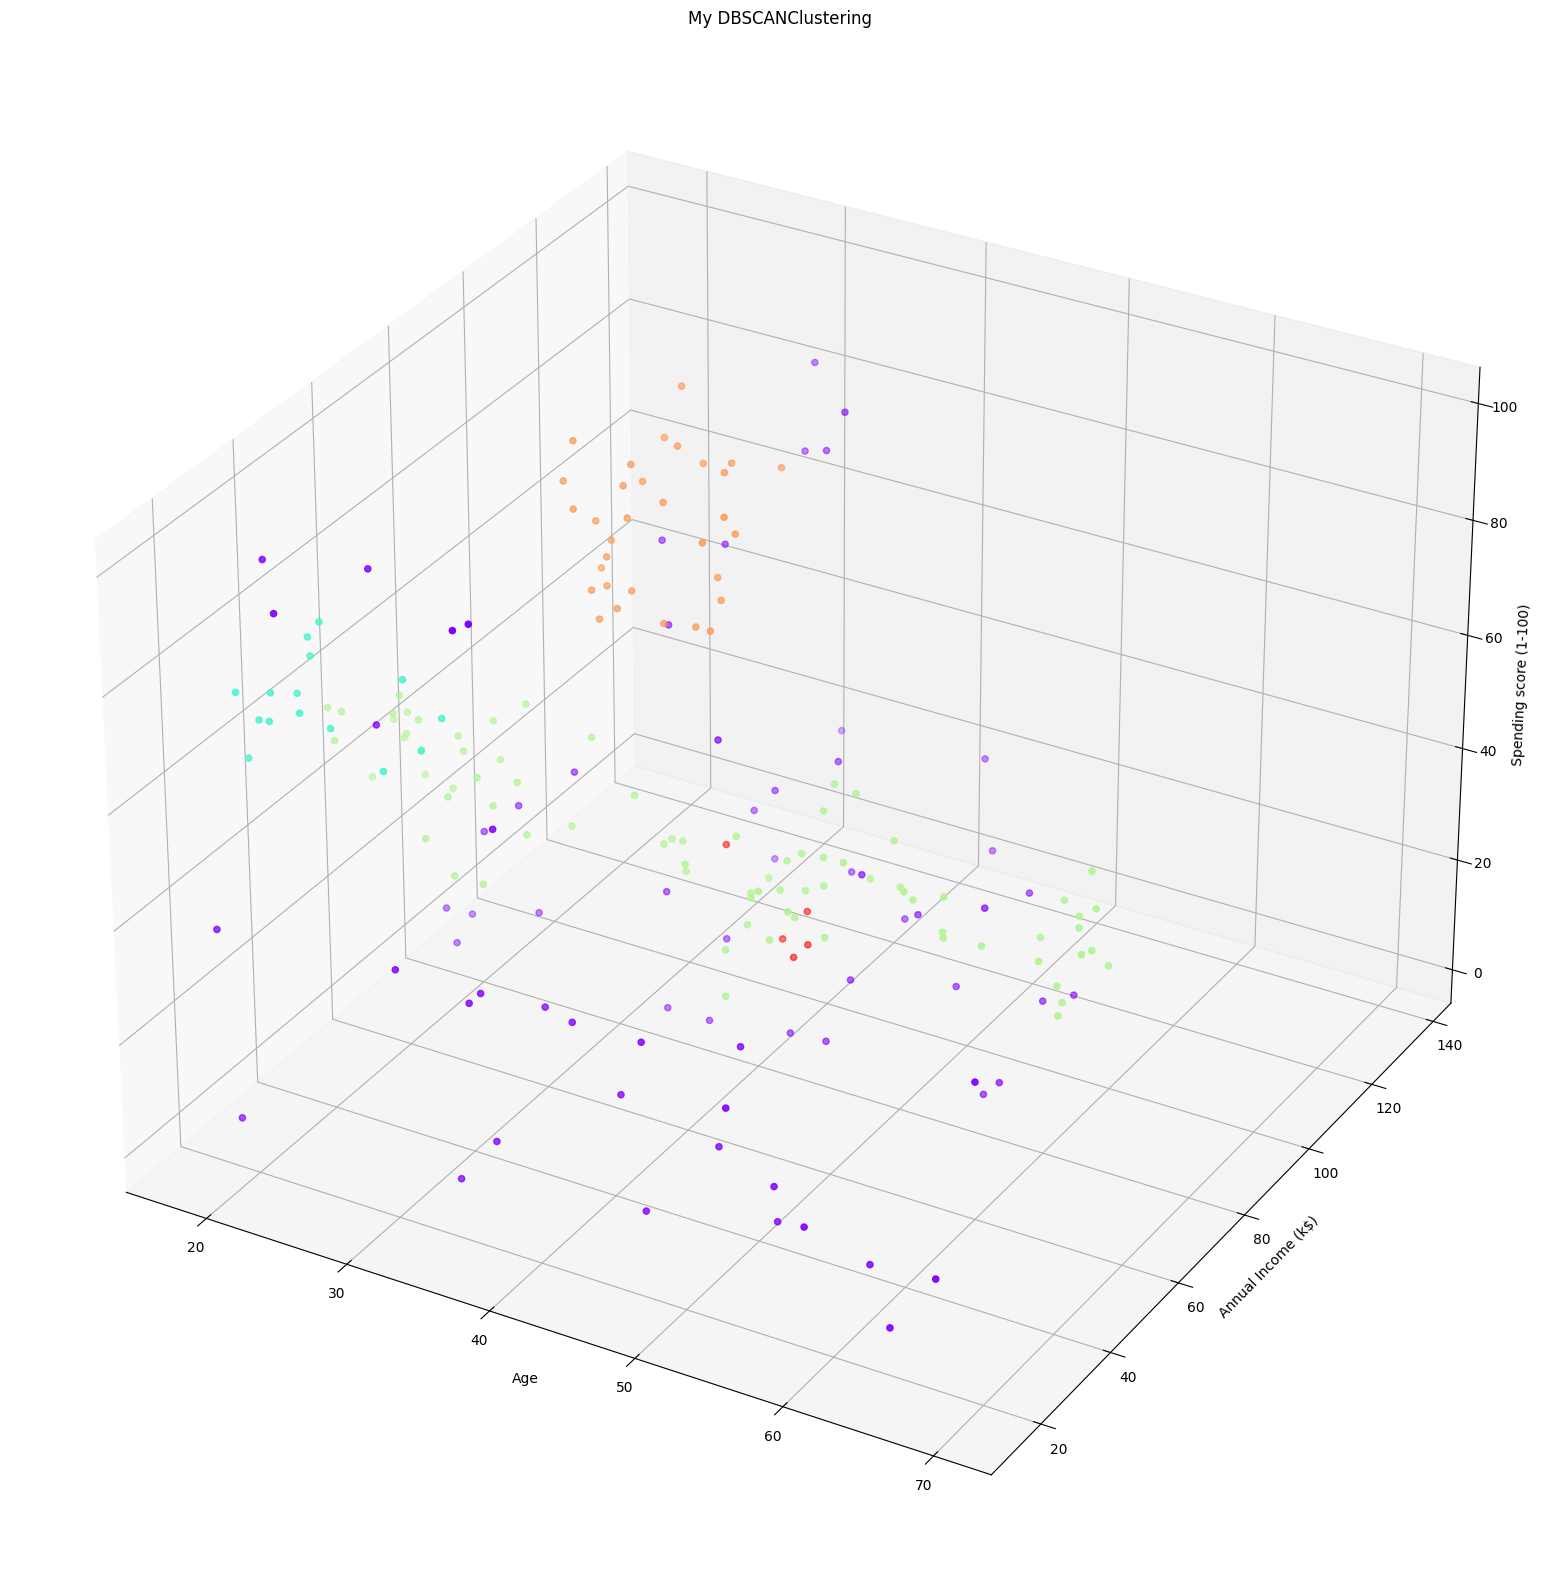

extra=49.572998552760865
mean_intra=25.140079132379828
fulfillment=[5, 15, 32, 69, 79]
time=0.8366782665252686s


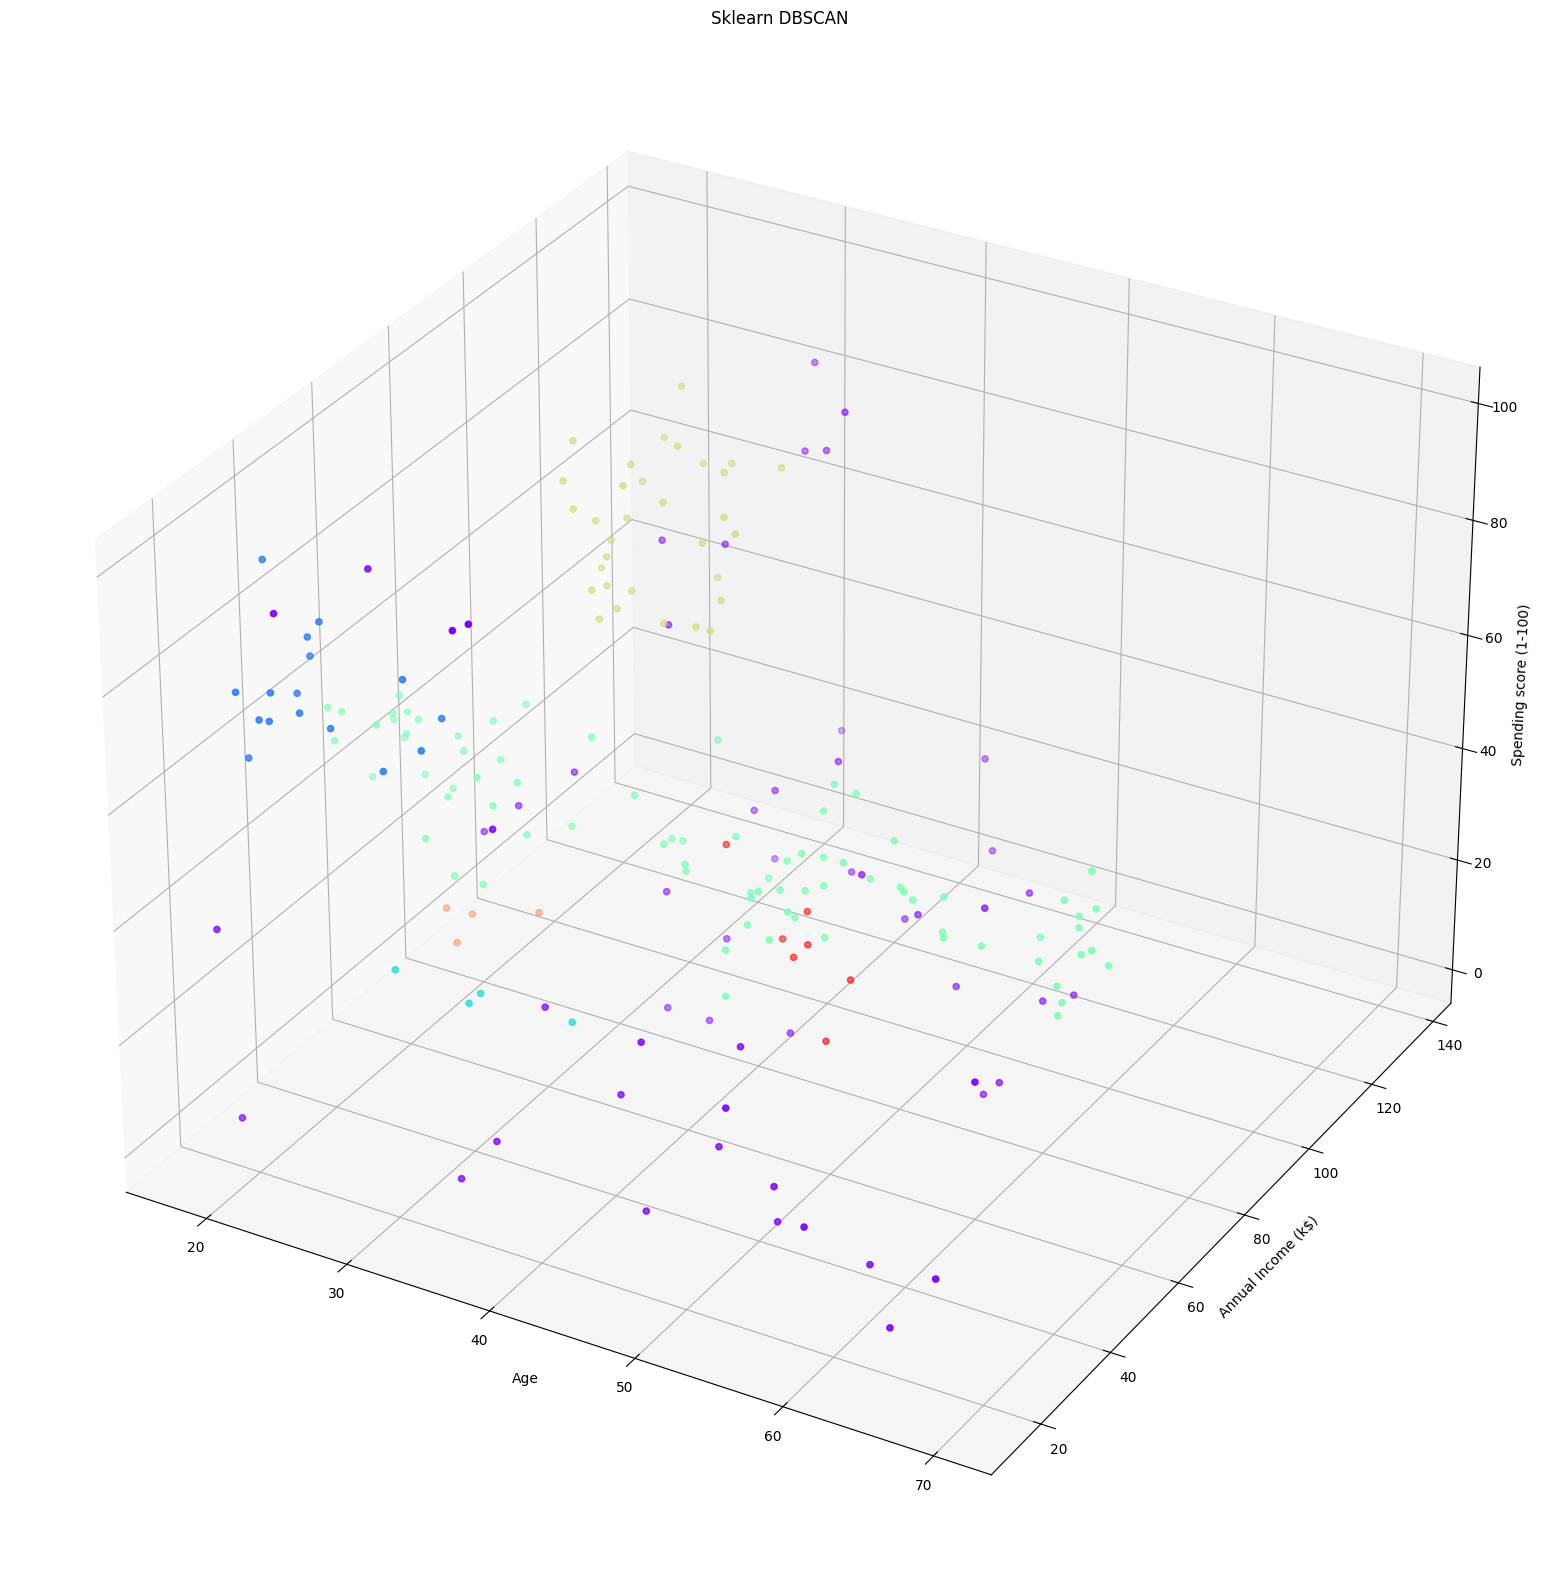

extra=52.09251544315682
mean_intra=21.082432809766562
fulfillment=[4, 4, 7, 16, 32, 56, 81]
time=0.22619009017944336s


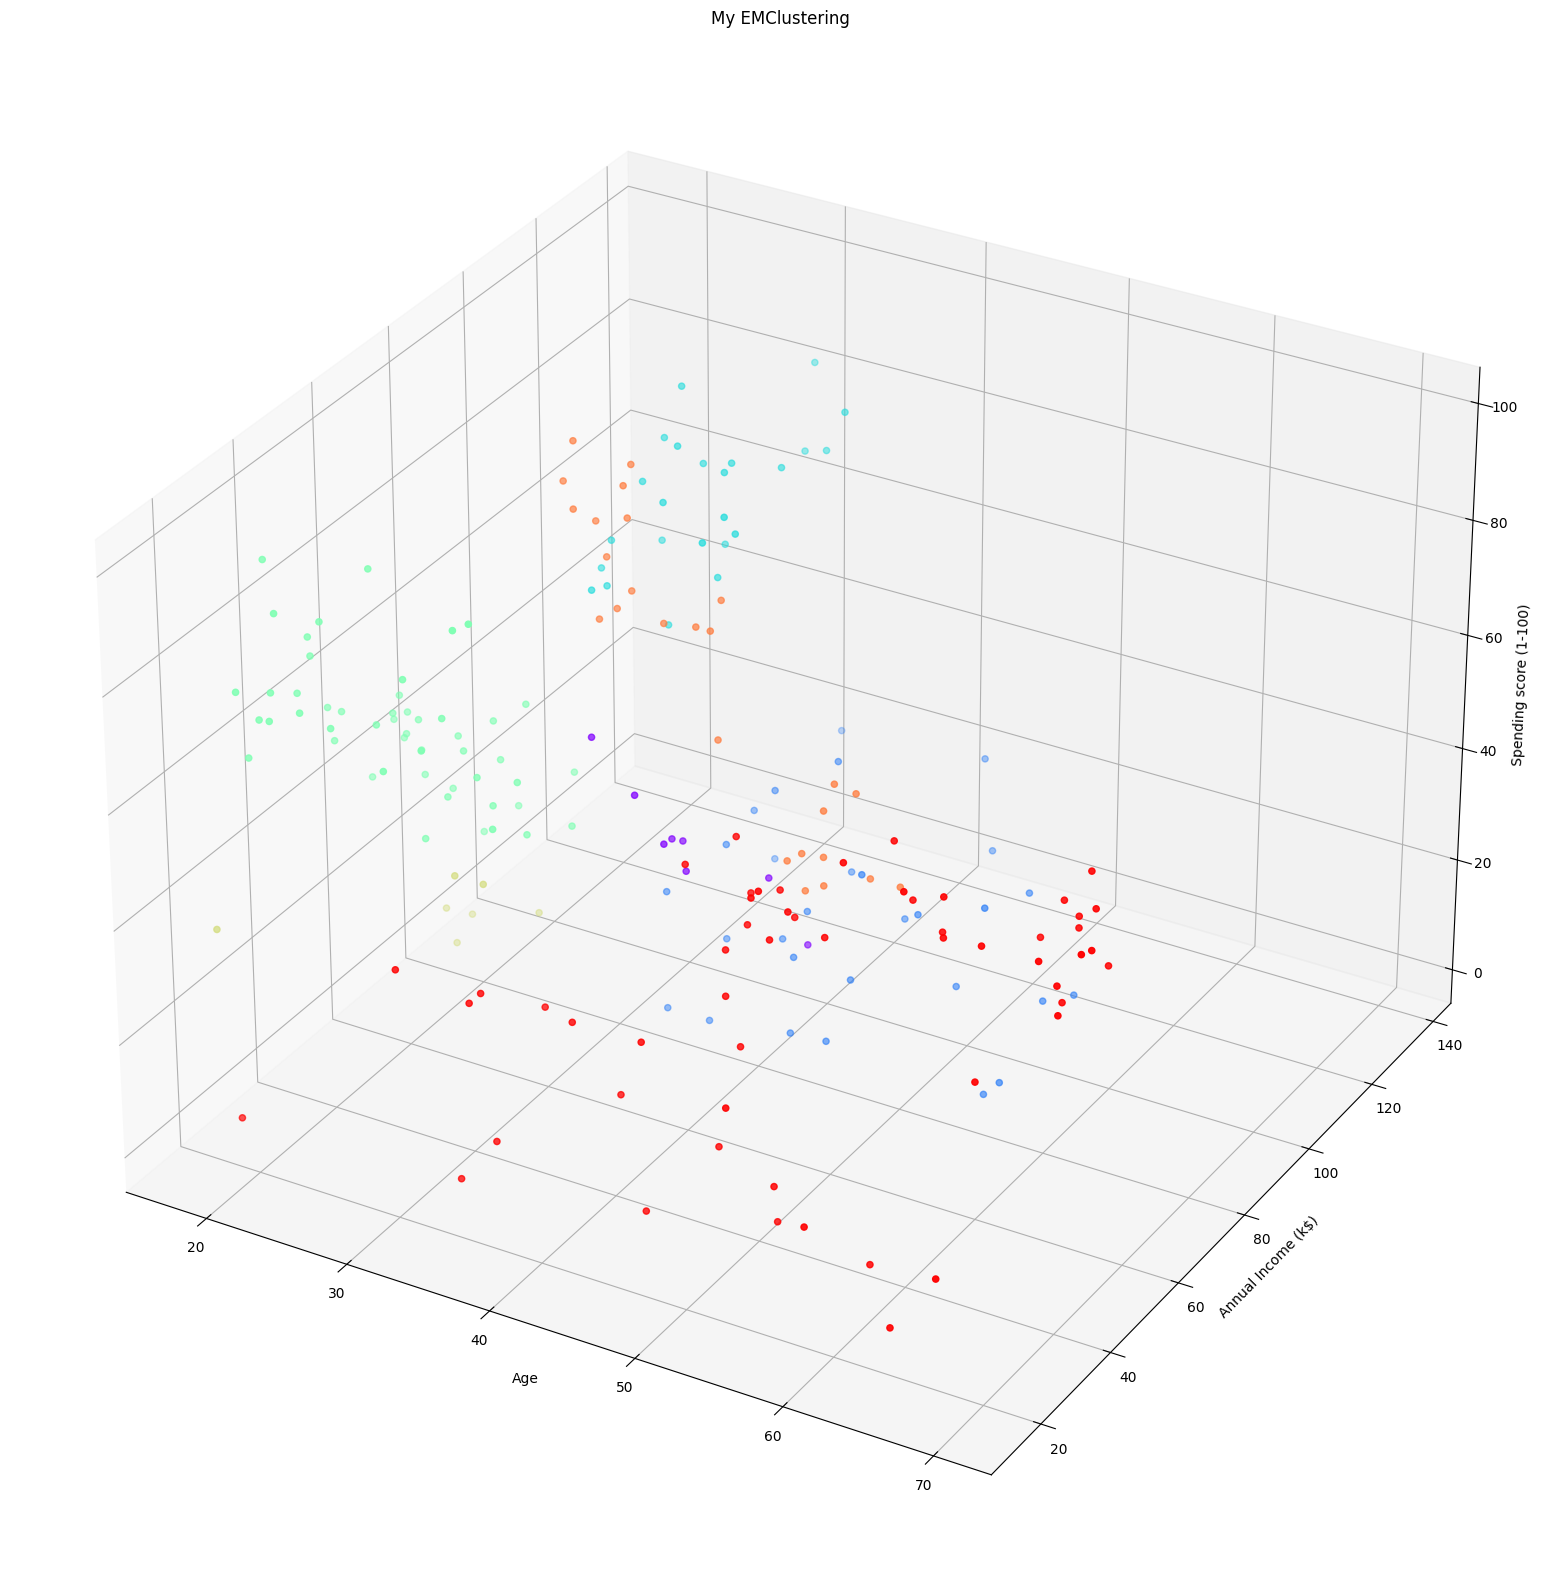

extra=45.248576533224046
mean_intra=28.16116720875565
fulfillment=[7, 8, 24, 26, 29, 51, 55]
time=0.23258590698242188s


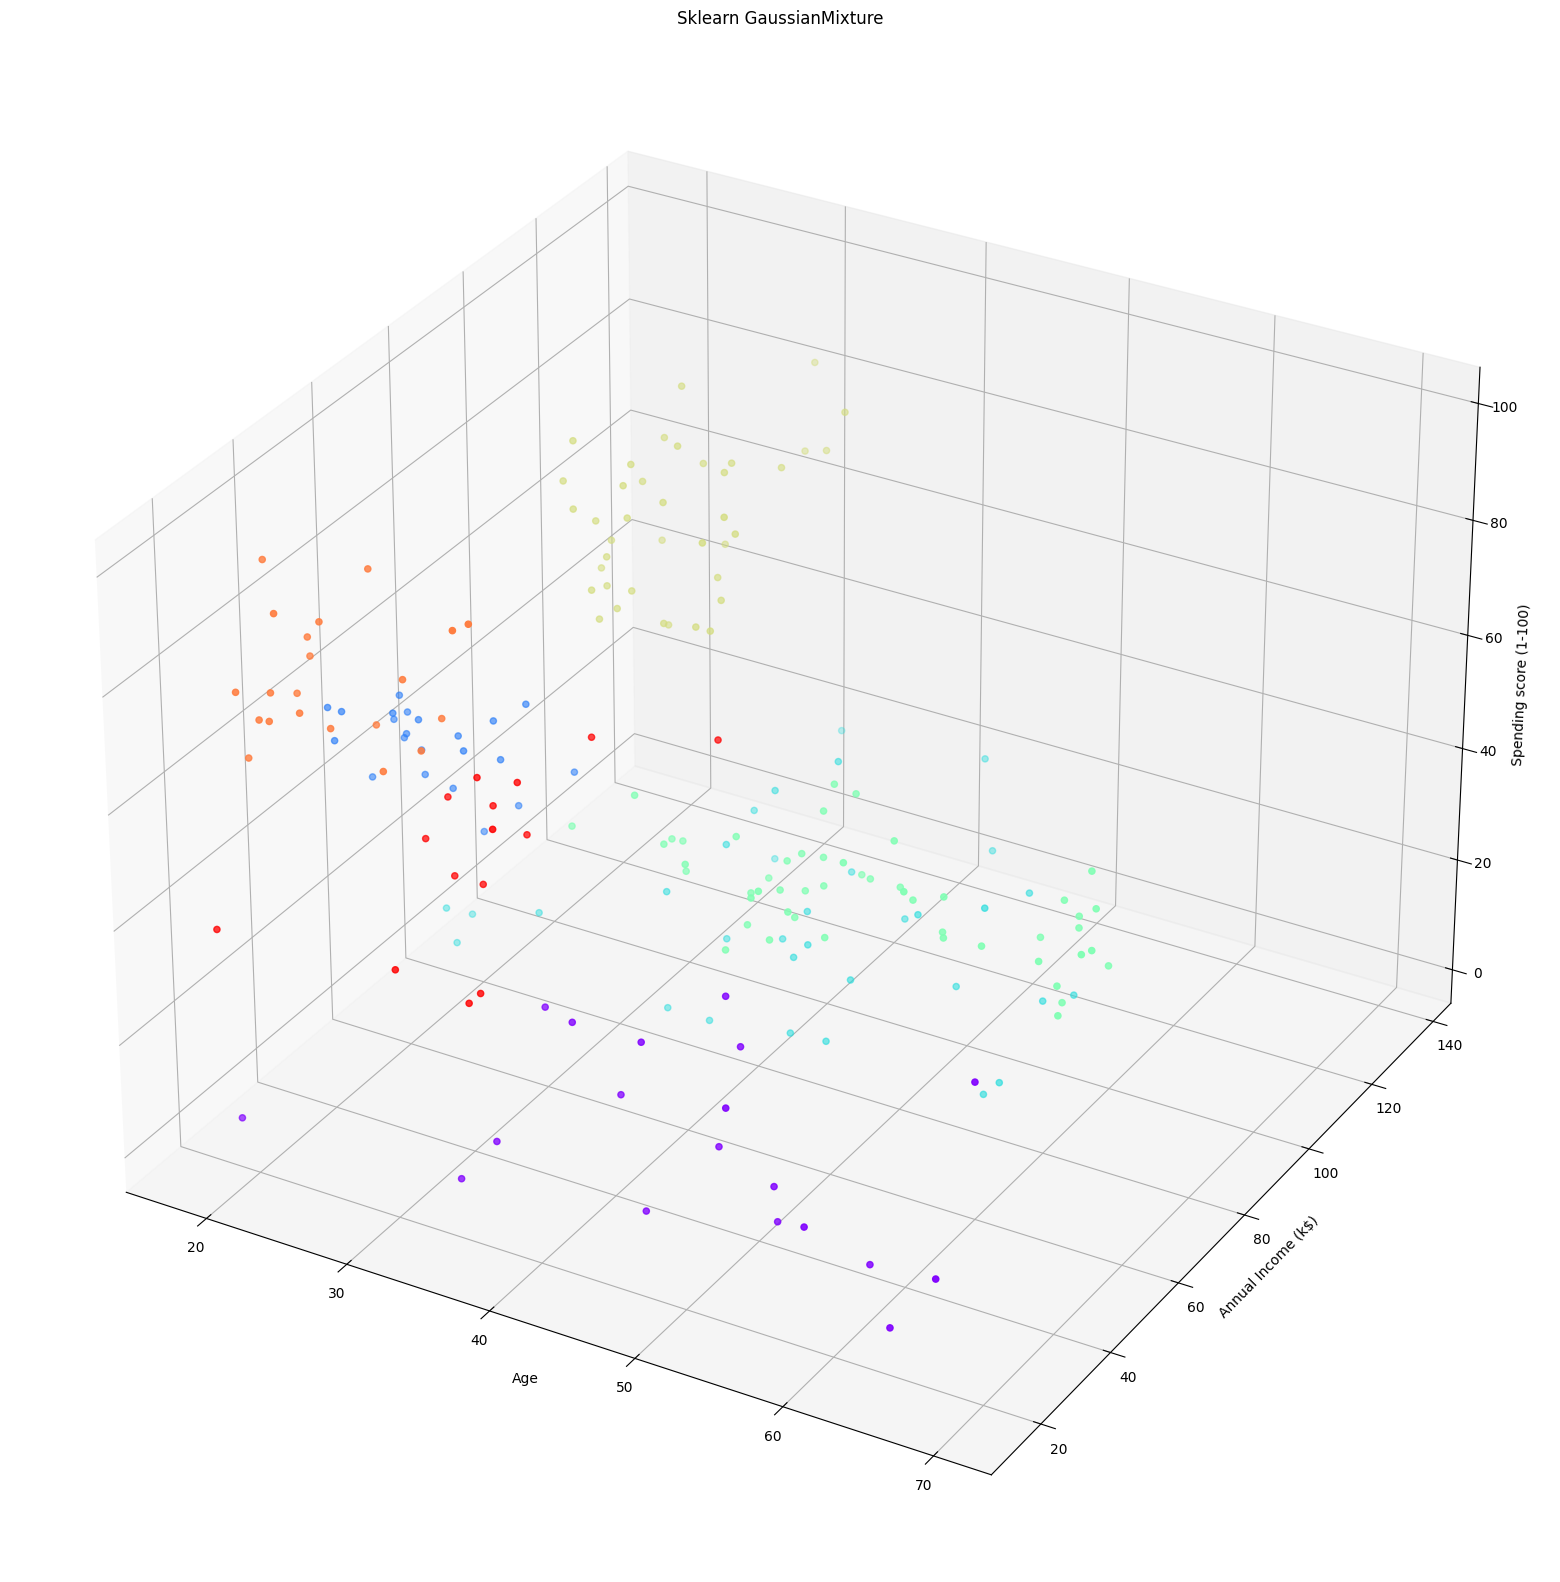

extra=52.22554059065145
mean_intra=21.444637658739563
fulfillment=[15, 19, 21, 22, 33, 39, 51]
time=0.23969197273254395s


In [66]:
for title, X, plotter, models_to_compare in datasets_to_test:
	compare_algorithms(models_to_compare, X, plotter)